# ℹ️ Introduction to data science notebooks

You can skip this section if you are already familiar with data science notebooks.

## Data science notebooks
A _data science notebook_ is a document that contains text cells (what you're reading right now) and code cells. What is unique with a notebook is that it's **interactive**: You can change or add code cells, and then **run** a cell by selecting it and then clicking the **Run** button above ( <strong>▶</strong>, or Run All ) or hitting `shift + enter`.

The result will be displayed directly in the notebook. 

Try running the cell below:

In [8]:
# Run this cell to see the result
101 * 1.75 * 16

2828.0

Modify any of the numbers and rerun the cell.

## Data science notebooks & data analysis
Notebooks are great for interactive data analysis. Let's create a pandas DataFrame using the `read_csv()` function. 

We will load the dataset "exams.csv" containing year-end exam grades for a thousand students.

By using the `head()` command, we display the first five rows of data:

In [9]:
# Importing the pandas module
import pandas as pd

# Reading in the data
df = pd.read_csv('data/exams.csv')

# Take a look at the first datapoints
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## Data analysis example:

Find the average reading score for each race/ethnicity group. 

We can use `groupby` to group the information by the column "race/ethnicity". Then we select the column "reading" and use `.mean()` to get the average grade for each group:

In [10]:
df.groupby('race/ethnicity')[['reading']].mean()

,reading
race/ethnicity,
group A,64.674157
group B,67.352632
group C,69.103448
group D,70.030534
group E,73.028571


## Data science notebooks & visualizations
Visualizations are very helpful to summarize data and gain insights. A well-crafted chart often conveys information much better than a table.

It is very straightforward to include plots in a data science notebook. For example, let's look at the average writing score by lunch group and gender. 

We are using the `seaborn` library for this example. We will use the `catplot()` function on the data we want to display.

In [11]:
import seaborn as sns

sns.catplot(x='lunch', y='writing', col='gender', data=df, kind='bar');

# Analyzing exam scores

Now let's now move on to the competition and challenge.

## 📖 Background
Your best friend is an administrator at a large school. The school makes every student take year-end math, reading, and writing exams.

Since you have recently learned data manipulation and visualization, you suggest helping your friend analyze the score results. The school's principal wants to know if test preparation courses are helpful. She also wants to explore the effect of parental education level on test scores. 

## 💾 The data

#### The file has the following fields ([source](http://roycekimmons.com/tools/generated_data/exams)):
- "gender" - male / female
- "race/ethnicity" - one of 5 combinations of race/ethnicity
- "parent_education_level" -  highest education level of either parent
- "lunch" - whether the student receives free/reduced or standard lunch
- "test_prep_course" - whether the student took the test preparation course
- "math" -  exam score in math 
- "reading" -  exam score in reading 
- "writing" -  exam score in writing 

In [12]:
df.head()

,gender,race/ethnicity,parent_education_level,lunch,test_prep_course,math,reading,writing
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


## 💪 Challenge
Create a report to answer the principal's questions. Include:

1. What are the average reading scores for students with/without the test preparation course?
2. What are the average scores for the different parental education levels?
3. Create plots to visualize findings for questions 1 and 2.
4. [Optional] Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).
5. [Optional 2] The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores. 
6. Summarize your findings.

## 💡 Learn more

The following DataCamp courses can help review the skills needed for this challenge:

* [Data Manipulation with pandas](https://www.datacamp.com/courses/data-manipulation-with-pandas)
* [Introduction to Data Visualization with Seaborn](https://www.datacamp.com/courses/introduction-to-data-visualization-with-seaborn)
* [Introduction to Statistics in Python](https://www.datacamp.com/courses/introduction-to-statistics-in-python)

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the introduction to data science notebooks, so the workbook is focused on your story.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

Question 1. What are the average reading scores for students with/without the test preparation course?


In [13]:
avg_reading_scores = df.groupby('test_prep_course')[['reading']].mean()
avg_reading_scores

,reading
test_prep_course,
completed,73.893855
none,66.534268


Question 2.What are the average scores for the different parental education levels?

In [14]:
Parent_edu_level = df.groupby('parent_education_level')['reading','writing','math']. mean()
Parent_edu_level


,reading,writing,math
parent_education_level,,,
associate's degree,70.927928,69.896396,67.882883
bachelor's degree,73.000000,73.381356,69.389831
high school,64.704082,62.448980,62.137755
master's degree,75.372881,75.677966,69.745763
some college,69.460177,68.840708,67.128319
some high school,66.938547,64.888268,63.497207


Question 3. Create plots to visualize findings for questions 1 and 2.

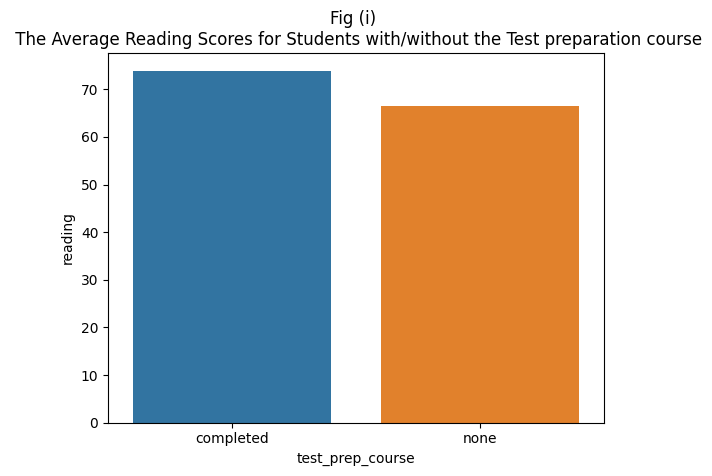

In [30]:
import matplotlib.pyplot as plt
sns.barplot(x =avg_reading_scores.index, y = avg_reading_scores.reading, data =avg_reading_scores, label = 'reading scores' )
plt.title('Fig (i) \n The Average Reading Scores for Students with/without the Test preparation course')
plt.show()

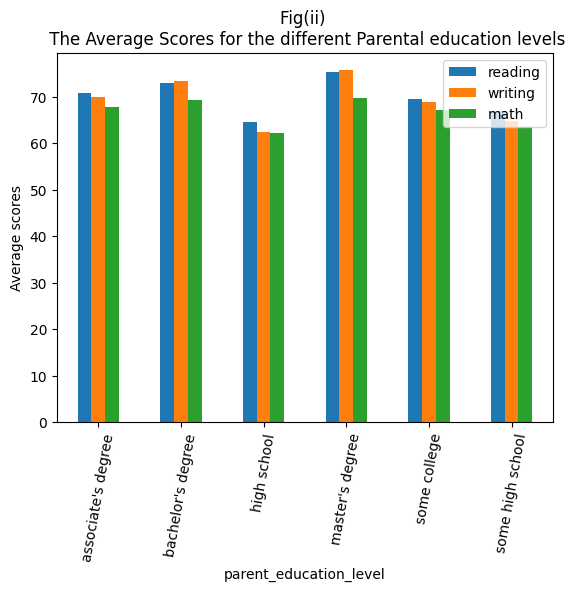

In [31]:
Parent_edu_level.plot(kind = 'bar')
plt.xticks(rotation = 80)
plt.ylabel('Average scores')
plt.title('Fig(ii) \n The Average Scores for the different Parental education levels')
plt.show()

Question4. Look at the effects within subgroups. Compare the average scores for students with/without the test preparation course for different parental education levels (e.g., faceted plots).

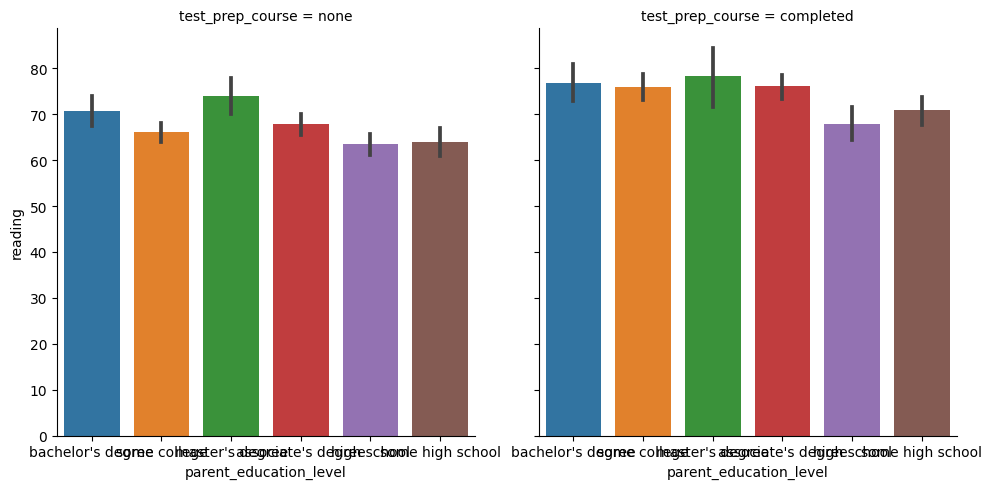

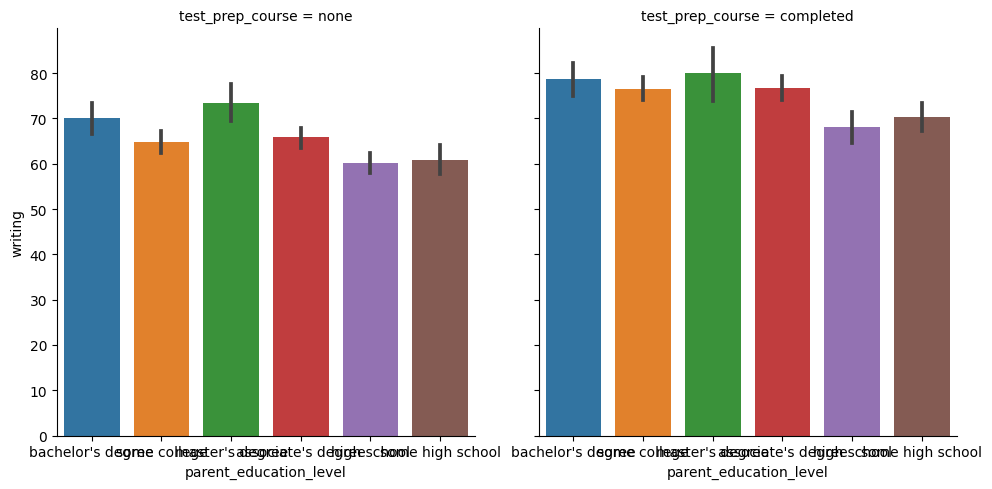

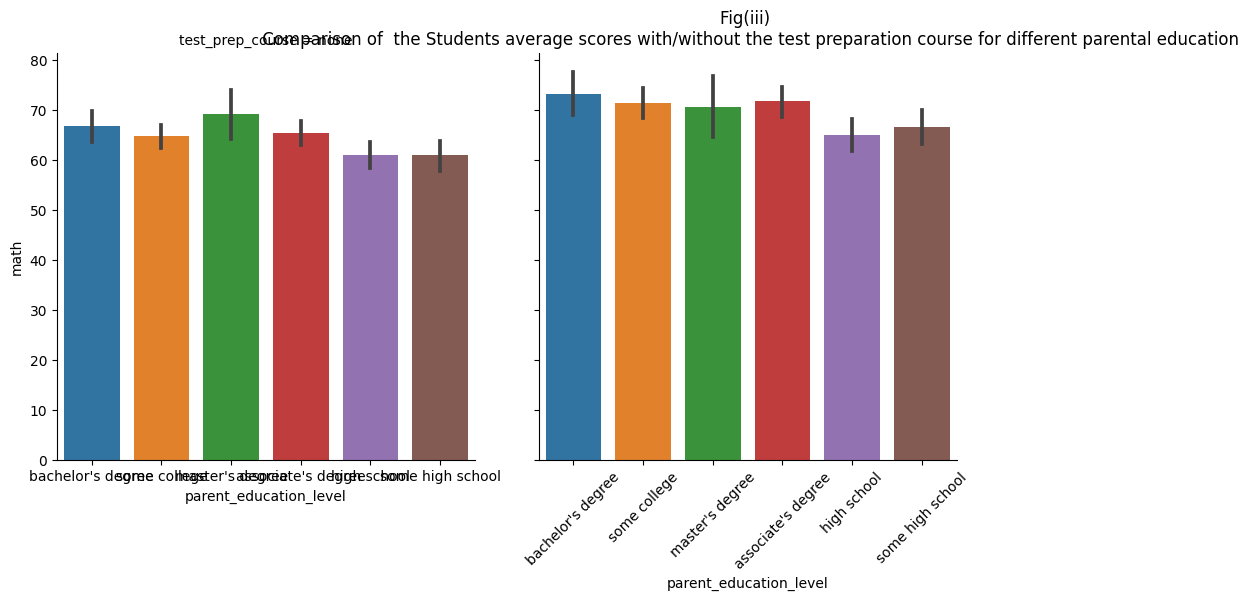

In [32]:
sns.catplot(x='parent_education_level', y='reading', col='test_prep_course', data=df, kind='bar');
plt.ylabel('Reading scores')
sns.catplot(x='parent_education_level', y='writing', col='test_prep_course', data=df, kind='bar')
plt.ylabel('Writing scores')
sns.catplot(x='parent_education_level', y='math', col='test_prep_course', data=df, kind='bar')
plt.xticks(rotation = 45)
plt.title('Fig(iii) \n Comparison of  the Students average scores with/without the test preparation course for different parental education')

plt.show()

Question 5. The principal wants to know if kids who perform well on one subject also score well on the others. Look at the correlations between scores.

In [21]:
subject_correlation = df.corr()
subject_correlation

,math,reading,writing
math,1.000000,0.817580,0.802642
reading,0.817580,1.000000,0.954598
writing,0.802642,0.954598,1.000000


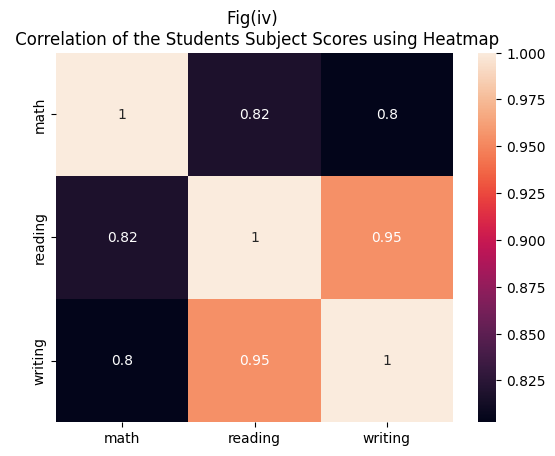

In [34]:
sns.heatmap(subject_correlation,annot = True)
plt.title('Fig(iv) \n Correlation of the Students Subject Scores using Heatmap')
plt.show()

Question 6.
Summarize your findings.



In [24]:
df.describe()

,math,reading,writing
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


The followings are the summary drawn from the above Exploratory Data Analysis.
It was observed that students performances were more dependent on taking the test preparation courses than their parent's educational level. Higher scores were recorded from students who took the preparation courses.
This is fully displayed in Fig(iii)

The parental level of education also had huge effect on the students' performances. Fig (ii) shows that stdents whose parents had high school has their level of education performed lower than other students. Students whose parents have Madters degree had the highest performances compared with students whose parents are high school holder who had the poorest performances.

Students  scores  were higher in reading, writing and  maths respectively. Also there were higher correlation in their performances in reading and writing subjects. That is Students with high grade in reading also had high grade in writing and vice versa. As observed on the heatmap shown in Fig(iv).

